example of extracting paths from matplotlib lined contour and over-plotting a patch from a single contour path:

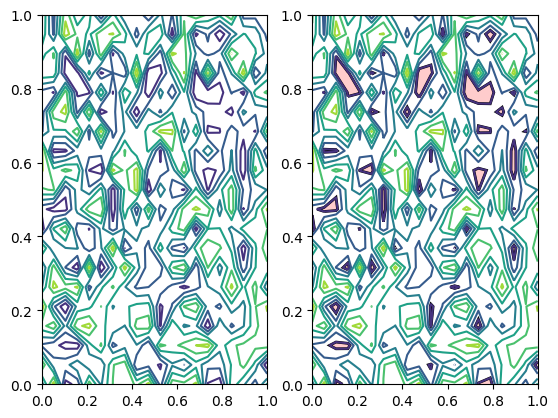

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np 

r = np.random.random((20,20))
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)

fig, ax = plt.subplots(ncols=2, nrows=1)
c = ax[0].contour(x, y, r)
_ = ax[1].contour(x, y, r)

p = c.get_paths()
patch = patches.PathPatch(p[1], lw=2, facecolor=(1.,0,0,0.2))
ax[1].add_patch(patch)

how bout with yt? 

yt : [INFO     ] 2024-02-02 12:00:04,046 Sample dataset found in '/home/chris/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-02-02 12:00:04,295 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-02-02 12:00:04,295 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-02-02 12:00:04,296 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-02 12:00:04,297 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-02-02 12:00:04,297 Parameters: cosmological_simulation   = 0
Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 13734.38it/s]
yt : [INFO     ] 2024-02-02 12:00:04,324 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2024-02-02 12:00:05,397 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-02-02 12:00:05,397 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-02-02 12:00:05,400 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-02

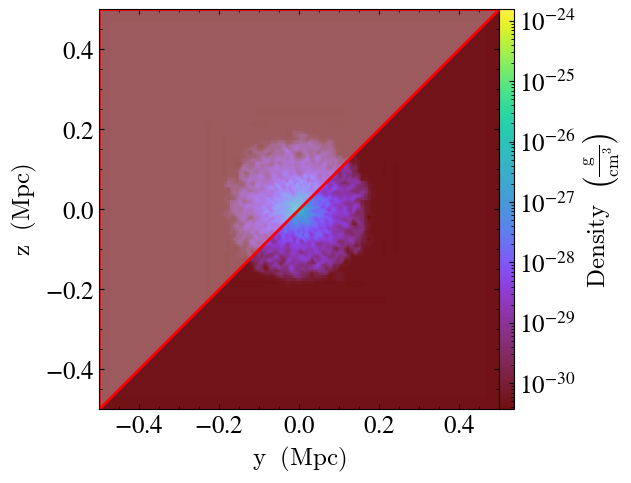

In [2]:
import yt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

# arbitrary path
p = Path(np.column_stack([[-.5, .5, -.5, -.5], [-0.5, 0.5, 0.5, -0.5]]))
patch = patches.PathPatch(p, facecolor=(1., 1., 1., 0.3), lw=2, edgecolor='r')


ds = yt.load_sample("IsolatedGalaxy")
slc = yt.SlicePlot(ds, 'x', ('gas', 'density'), window_size=(4,4))

# extract underlying matplotlib axis
gd = slc.plots[('gas', 'density')]
gd.axes.add_patch(patch)
gd.figure.savefig('/home/chris/Desktop/image.png')
gd.figure